<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

1)

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


2)

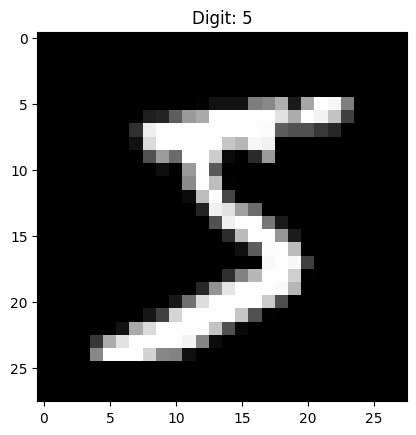

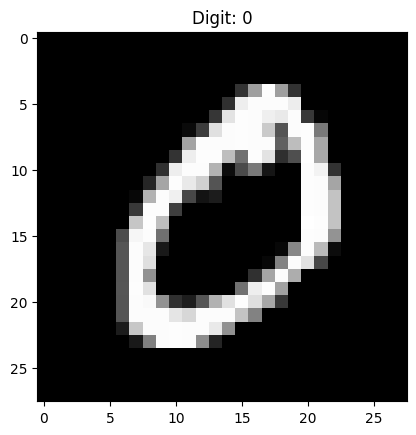

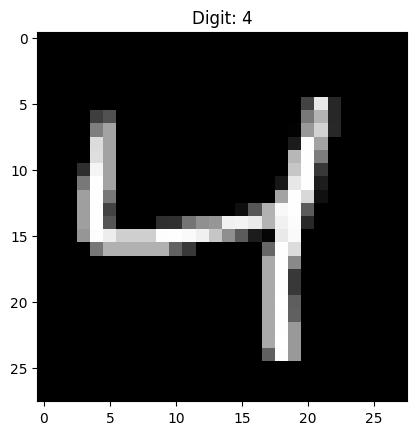

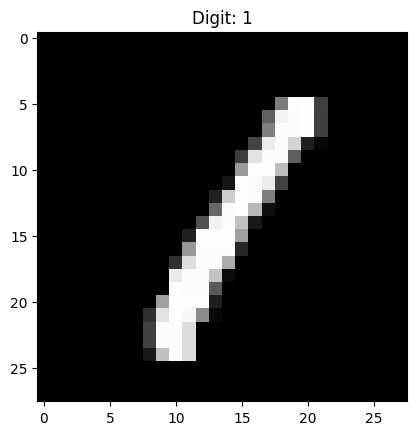

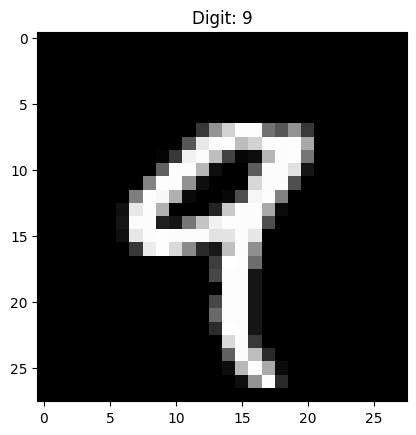

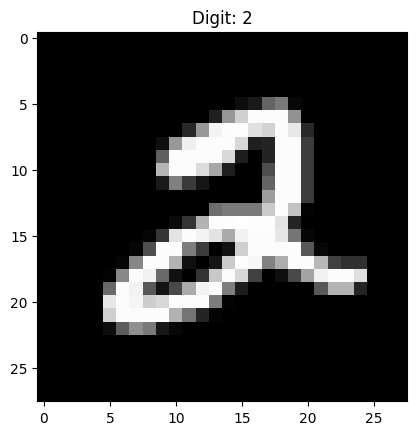

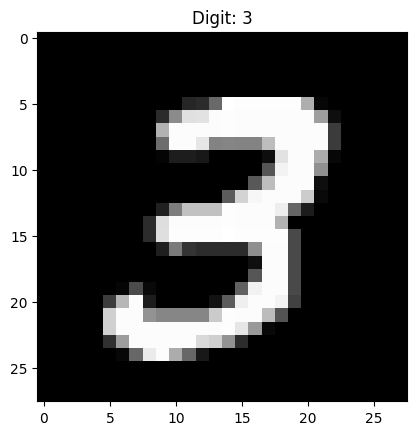

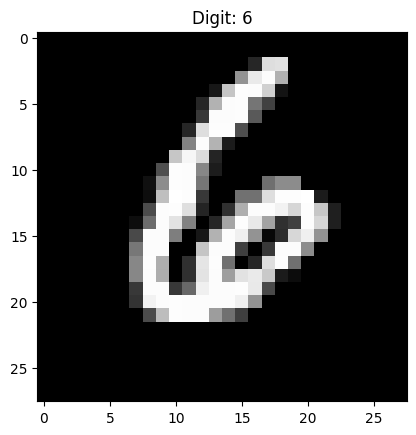

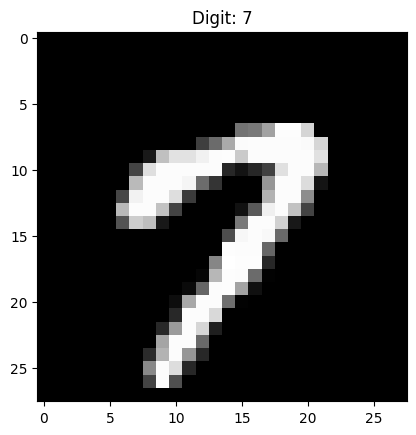

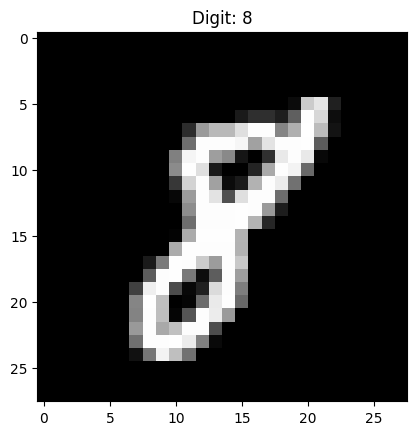

In [17]:
digits = []
for i in range(len(y_train)):
  if len(digits) == 10:
    break
  if y_train[i] not in digits:
    digits.append(y_train[i])
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.show()


3)

In [18]:
print(f'Size of image is: {x_train[0].shape}')

Size of image is: (28, 28)


Σημαντικά είναι τα pixels με φωτεινές εντάσεις, το backround δεν μας ενδιαφέρει τόσο πολύ γιατί για όλες τις εικόνες είναι 0. Ρόλο στην περίπτωση μας θα παίξουν οι θέσεις των pixels, οι εντάσεις τους και η τοποθέτηση των αριθμών στην εικόνα ώστε να υπολογιστούν οι αποστάσεις. (* Όσο περισσότερα εγγεγραμένα pixels έχει μία εικόνα με μία άλλη, τόσο μεγαλύτερη ομοιότητα). Το backround είναι σημαντικό στην περίπτωση που ένας αριθμός έχει φωτεινά pixels σε κάποια θέση, αν ο άλλος αριθμός έχει μαύρα στη συγκεκριμένη, θα μεγαλώσει η απόσταση.

4)

In [19]:
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


5)

In [20]:
k_n = [5, 15, 51, 245]
accuracy_train = []
accuracy_test = []
for i in range(len(k_n)):
  model = knn(n_neighbors=k_n[i])
  model.fit(x_train, y_train)
  y_pred_tr = model.predict(x_train)
  accuracy_train.append(accuracy_score(y_train, y_pred_tr))
  y_pred_te = model.predict(x_test)
  accuracy_test.append(accuracy_score(y_test, y_pred_te))





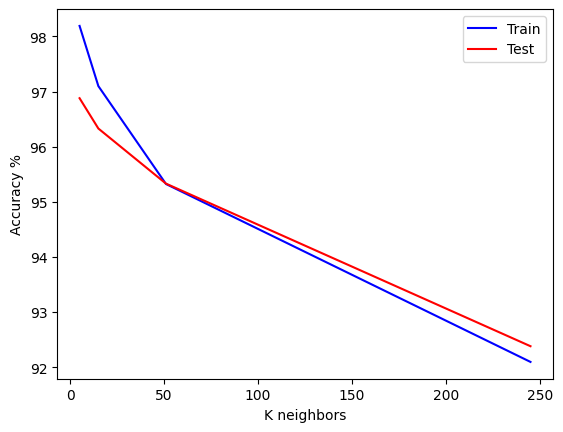

[98.19166666666666, 97.1, 95.32333333333334, 92.095]
[96.88, 96.33, 95.33, 92.38]


In [21]:
accuracy_train = [i*100 for i in accuracy_train]
accuracy_test = [i*100 for i in accuracy_test]
plt.plot(k_n, accuracy_train, color='b', label='Train')
plt.plot(k_n, accuracy_test, color='r', label='Test')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()
print(accuracy_train)
print(accuracy_test)

6)

In [26]:
accuracy_train_new = []
accuracy_test_new = []
for i in range(len(k_n)):
  model = knn(n_neighbors=k_n[i])
  model.fit(x_train/255, y_train)
  y_pred_tr_n = model.predict(x_train/255)
  accuracy_train_new.append(accuracy_score(y_train, y_pred_tr_n))
  y_pred_te_n = model.predict(x_test/255)
  accuracy_test_new.append(accuracy_score(y_test, y_pred_te_n))


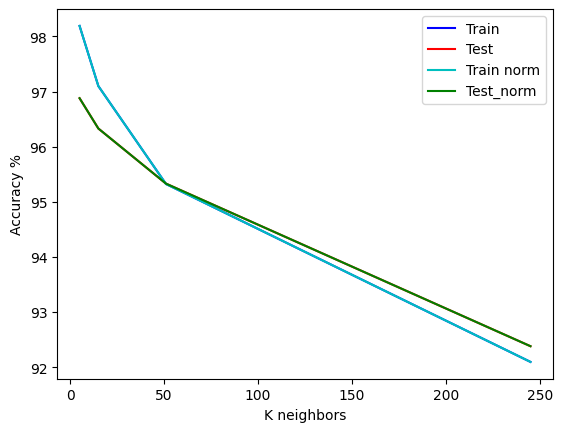

In [27]:
accuracy_train_new = [i*100 for i in accuracy_train_new]
accuracy_test_new = [i*100 for i in accuracy_test_new]
plt.plot(k_n, accuracy_train, color='b', label='Train')
plt.plot(k_n, accuracy_test, color='r', label='Test')
plt.plot(k_n, accuracy_train_new, color='c', label='Train norm')
plt.plot(k_n, accuracy_test_new, color='g', label='Test_norm')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()


7)

[9]


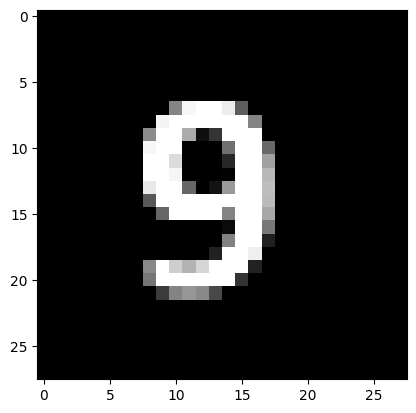

In [47]:
from PIL import Image
import numpy as np
digit = Image.open('9.png')
digit_9 = digit.convert('L')
digit_9 = np.array(digit_9)
digit_9 = digit_9.flatten()
digit_9 = digit_9/255
digit_pred = model.predict([digit_9])
print(digit_pred)
plt.imshow(digit)

